Loss: 0.3544848491414598, epoch: 0/300
Loss: 1.3476781491050805e-07, epoch: 90/300
Loss: 5.718758799844182e-14, epoch: 180/300
Loss converged to zero at epoch: 210, Loss: 0.0


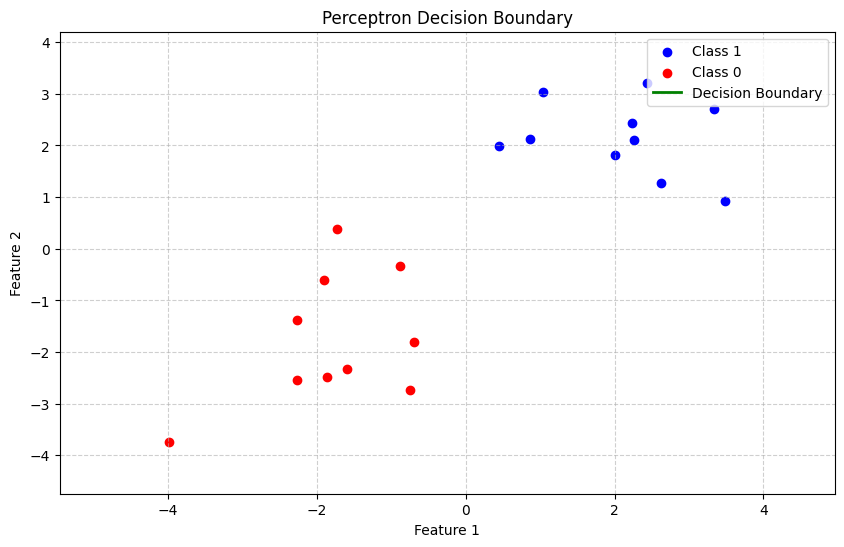

In [5]:
import numpy as np 
from types import FunctionType

def relu(z):
    return z.sum() if z.all() >= 0 else 0

def forward(input: np.ndarray, weights: np.ndarray, bias:float, active_func_callback: FunctionType):
    z = np.dot(weights, input) + bias
    return active_func_callback(z)

def loss_func(y: np.ndarray, ypred: np.ndarray):
    return (y - ypred).mean()

def step_backward(input: np.ndarray, weights: np.ndarray, bias: float, error: float, lr):
    new_weights = weights + lr * (error) * input
    new_bias = bias + lr * (error)
    return new_weights, new_bias

def train(X, y, lr=0.01, epochs=10):
    weights = np.zeros(X.shape[1])
    bias = 0.0

    for epoch in range(epochs):
        loss = 0.0
        for i in range(len(X)):
            ypred = forward(X[i], weights, bias, relu)
            loss = loss_func(y, ypred)
            if loss != 0:
                weights, bias = step_backward(X[i], weights, bias, loss, lr)
        if loss == 0:
            print(f"Loss converged to zero at epoch: {epoch}, Loss: {loss}")
            break
        if epoch % 90 == 0:
            print(f"Loss: {loss}, epoch: {epoch}/{epochs}")

    return weights, bias

np.random.seed(10)
X = np.vstack([np.random.randn(10, 2) + [2, 2], np.random.randn(10, 2) + [-2, -2]])
y = np.array([1]*10 + [0]*10)

weights, bias = train(X, y, epochs=300)

import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, weights, bias):
    plt.figure(figsize=(10, 6))
    
    # 1. Scatter the data points first
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')

    # 2. Define the x-range for the line
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x_values = np.array([x_min, x_max])

    # 3. Solve for y (x2) by dividing the functions:
    # 0 = w0*x + w1*y + bias  =>  y = -(w0*x + bias) / w1
    if weights[1] != 0:
        y_values = -(weights[0] * x_values + bias) / weights[1]
        plt.plot(x_values, y_values, label='Decision Boundary', color='green', linewidth=2)
    else:
        # Handle the vertical line case (division by zero)
        x_intercept = -bias / weights[0]
        plt.axvline(x=x_intercept, label='Decision Boundary', color='green', linewidth=2)

    # 4. Set plot limits to keep the boundary in view of the data
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    
    plt.title('Perceptron Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
plot_decision_boundary(X, y, weights, bias) 